<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_8/P8_Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3
Para el siguiente sistema y despreciando la variación de energía cinética y potencial, determinar:
- $W$ máquina térmica, $Q$ perdido, $W$ disponible y $W$ paletas
- $T_f$ y $V_f$ del recipiente
- $\Delta S_u$ (variación de entropía del universo)
- $W$ perdido y $W_{\Delta V}$ del pistón
- $\eta_{ex}$ del proceso

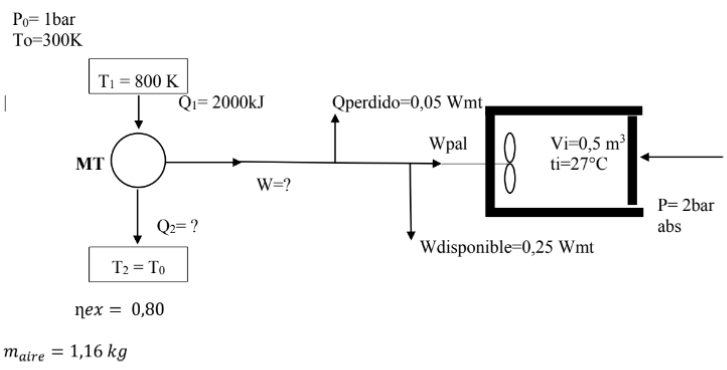

---
## Solución

In [1]:
# Datos:
T_1 = 800 # [K]
T_2 = T_0 = 300 # [K]
P_0 = 100 # [kPa]
Q_1 = 2000 # [kJ]
V_i = 0.5 # [m^3]
T_i = 27 + 273 # [K]
P = 200 # [kPa]
m_aire = 1.16 # [kg]
η_ex = 0.8
cp = 1.0047 # [kJ/(kg·K)]
cv = 0.7176 # [kJ/(kg·K)]
R  = 0.2870 # [kJ/(kg·K)]

---
### Máquina térmica

Variación de entropía de la fuente 1
$$\Delta S_1 = \frac{Q_1}{T_1}$$

Calor útil 1
$$Q_{u1} = Q_1 - T_0 \Delta S_1$$

Calor útil 2
$$Q_{u2} = 0$$

Rendimiento excergético de la máquina térmica

$$\eta_{ex} = \frac{W_{MT}}{Q_{u1}}$$

Trabajo de la máquina térmica
$$W_{MT} = \eta_{ex} Q_{u1}$$

$$W_{MT} = Q_1 + Q_2$$

Despejamos $Q_2$
$$Q_2 = W_{MT} - Q_1$$

Variación de entropía de la fuente 2
$$\Delta S_2 = \frac{Q_2}{T_2}$$

Calor perdido
$$Q_{perd} = 0,05 \cdot W_{MT}$$

Trabajo disponible
$$W_{disp} = 0,25 \cdot W_{MT}$$

Trabajo en las paletas
$$W_{pal} = W_{MT} - Q_{perd} - W_{disp}$$

In [2]:
# Variación de entropía de la fuente 1
ΔS_1 = Q_1/T_1
# Calor útil 1
Q_u1 = Q_1 - T_0*ΔS_1
# Calor útil 2
Q_u2 = 0
# Trabajo de la máquina térmica
W_mt = η_ex*Q_u1
# Calor 2
Q_2 = abs(W_mt - Q_1)
# Variación de entropía de la fuente 2
ΔS_2 = Q_2/T_2
# Calor perdido
Q_perd = 0.05*W_mt
# Trabajo disponible
W_disp = 0.25*W_mt
# Trabajo en las paletas
W_pal = W_mt - Q_perd - W_disp

In [3]:
#@title Resultados:
print("W_mt = %.2f [kJ]"%W_mt)
print("Q_perd = %.2f [kJ]"%Q_perd)
print("W_disp = %.2f [kJ]"%W_disp)
print("W_pal = %.2f [kJ]"%W_pal)

W_mt = 1000.00 [kJ]
Q_perd = 50.00 [kJ]
W_disp = 250.00 [kJ]
W_pal = 700.00 [kJ]


---
### Cilindro-pistón

Transformación a P=cte, puedo plantear 1°Principio en función de la entalpía.

Primer principio termodinámica
$$Q - W = \Delta U$$

Como es adiabático resulta
$$0 = \Delta U + W$$

$$0 = m_{aire} c_p (T_f - T_i) + W_{pal}$$

Despejando $T_f$
$$T_f = \frac{m_{aire} c_p T_i - W_{pal}}{m_{aire} c_p}$$

Volumen final
$$V_f = \frac{m_{aire} R T_f}{P}$$

Variación de entropía del aire
$$\Delta S_{aire} = m_{aire} \left( c_v \ln \frac{T_f}{T_i} + R \ln \frac{V_f}{V_i} \right)$$

Variación de entropía del calor perdido

$$\Delta S_{perd} = \frac{Q_{perd}}{T_0}$$

Variación de entropia del universo

$$\Delta S_u = \Delta S_1 + \Delta S_2 + \Delta S_{aire} + \Delta S_{perd}$$

Trabajo perdido
$$W_{perd} = T_0 \Delta S_u$$

Trabajo útil pistón
$$W_{U,pist} = (P - P_0) \cdot (V_f - V_i)$$

Variación de exergía del aire
$$\Delta Ex_{aire} =  W_{pal} - T_0 \Delta S_{aire} - W_{U,pist}$$

Rendimiento exergético
$$\eta_{ex} = \frac{\Delta Ex_{aire} + W_{U} + W_{disp}}{Q_{u1}}$$

In [4]:
import numpy as np

In [5]:
# Temperatura final
T_f = (m_aire*cp*T_i - (-W_pal))/(m_aire*cp)
# Volumen final
V_f = (m_aire*R*T_f)/P
# Variación den entropía del aire
ΔS_aire = m_aire*(cv*np.log(T_f/T_i) + R*np.log(V_f/V_i))
# Variación de entropía del calor perdido
ΔS_perd = Q_perd/T_0
# Variación de entropía del universo
ΔS_u = (-ΔS_1) + ΔS_2 + ΔS_aire + ΔS_perd
# Trabajo perdido
W_perd = T_0*ΔS_u
# Trabajo útil disponible
W_up = (P - P_0)*(V_f - V_i)
# Variación de exergía del aire
ΔEx_aire = W_pal - T_0*ΔS_aire - W_up
# Rendimiento exergético
η_ex = (ΔEx_aire + W_up + W_disp)/Q_u1

In [6]:
#@title Resultados:
print("T_f = %.2f [K]"%T_f)
print("V_f = %.2f [m^3]"%V_f)
print("ΔS_u = %.3f [kJ/K]"%ΔS_u)
print("W_perd %.2f [kJ]"%W_perd)
print("W_up = %.2f [kJ]"%W_up)
print("ΔEx_aire = %.2f [kJ]"%ΔEx_aire)
print("\nη_ex = %.2f"%η_ex)

T_f = 900.63 [K]
V_f = 1.50 [m^3]
ΔS_u = 2.281 [kJ/K]
W_perd 684.19 [kJ]
W_up = 99.92 [kJ]
ΔEx_aire = 215.89 [kJ]

η_ex = 0.45
